In [7]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [8]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [9]:
analysis = scripts.Analysis()

In [10]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_20',
                          'g_ascending_k_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_20',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a140ac7',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [11]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_20',
                          'g_ascending_k_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_20',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a140ac7',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [12]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [13]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [14]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [15]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [16]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 20

nref = 1

p_refs = (/ 500 /)

t_refs = (/ 250 /)

ng_refs = (/ 20 /)

data wgt
     &     /20 * 1/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'mls75.pro'


In [17]:
fig.display_hrefanchor()

In [18]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [19]:
table_dgdgs.display_hrefanchor()

In [20]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [21]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [22]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

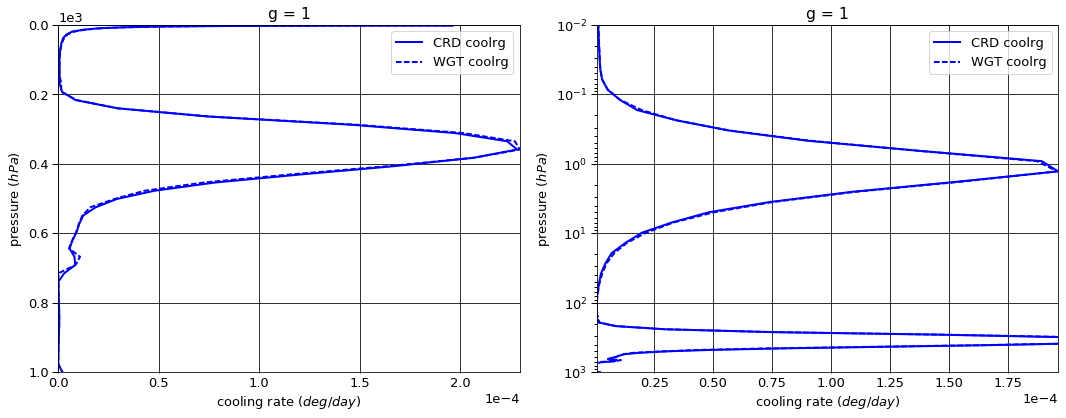

# Figure: cooling rate g-group 2

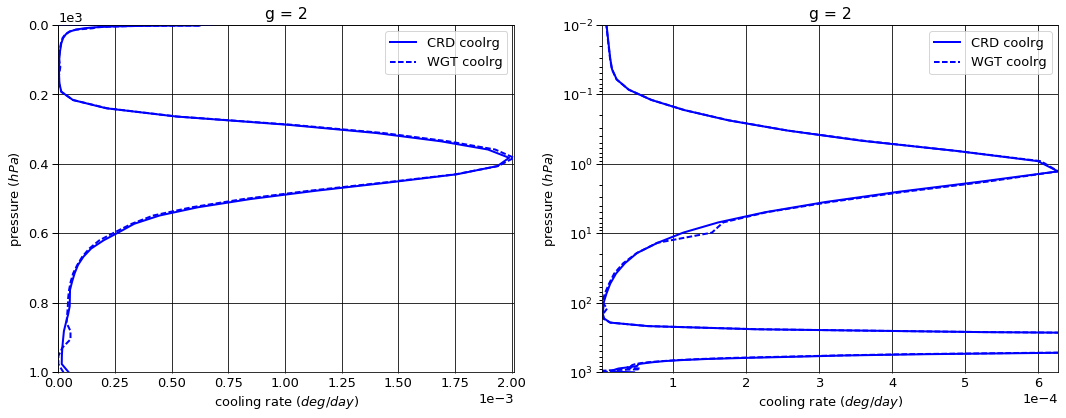

# Figure: cooling rate g-group 3

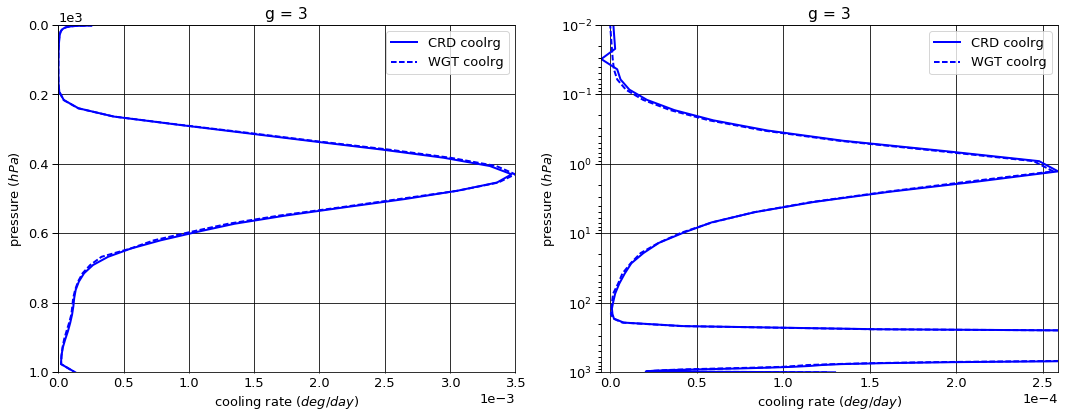

# Figure: cooling rate g-group 4

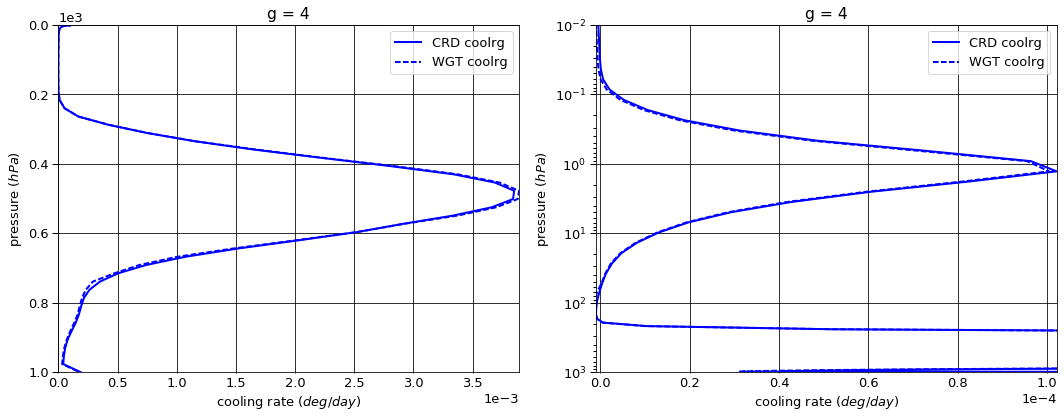

# Figure: cooling rate g-group 5

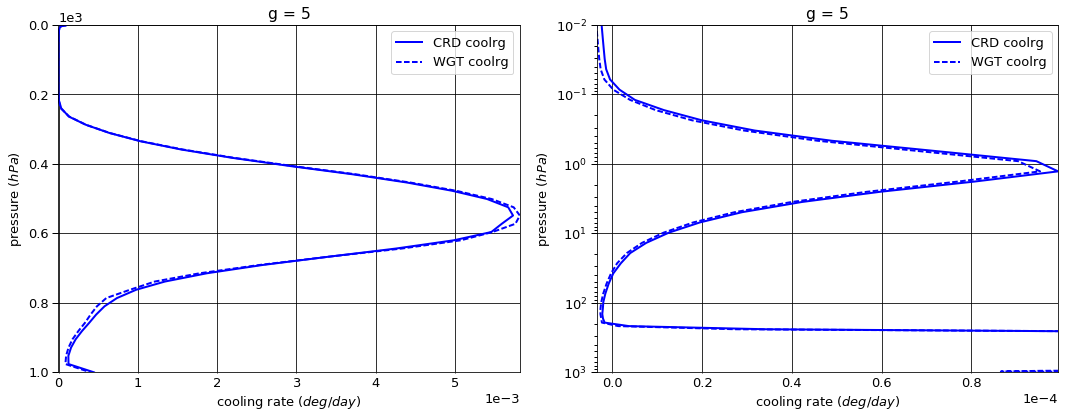

# Figure: cooling rate g-group 6

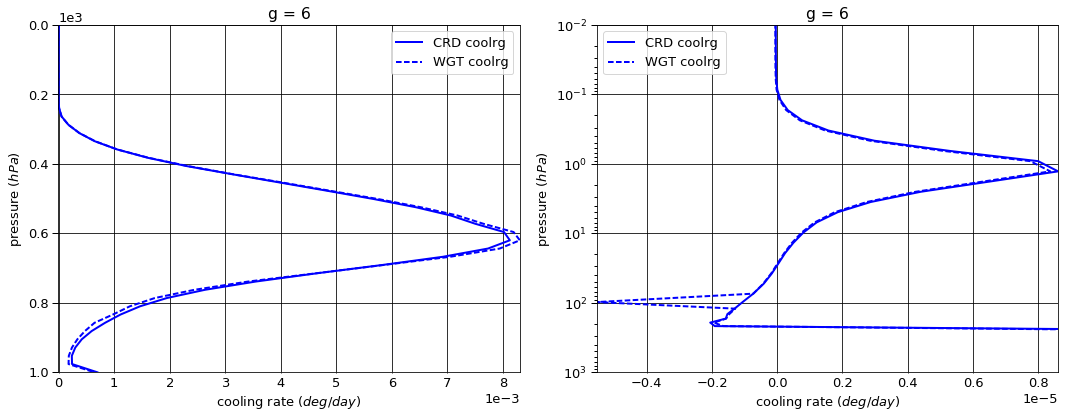

# Figure: cooling rate g-group 7

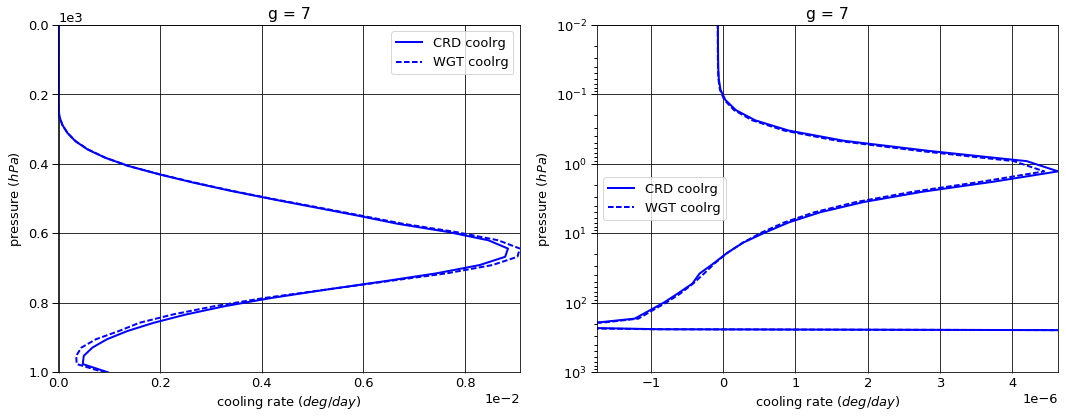

# Figure: cooling rate g-group 8

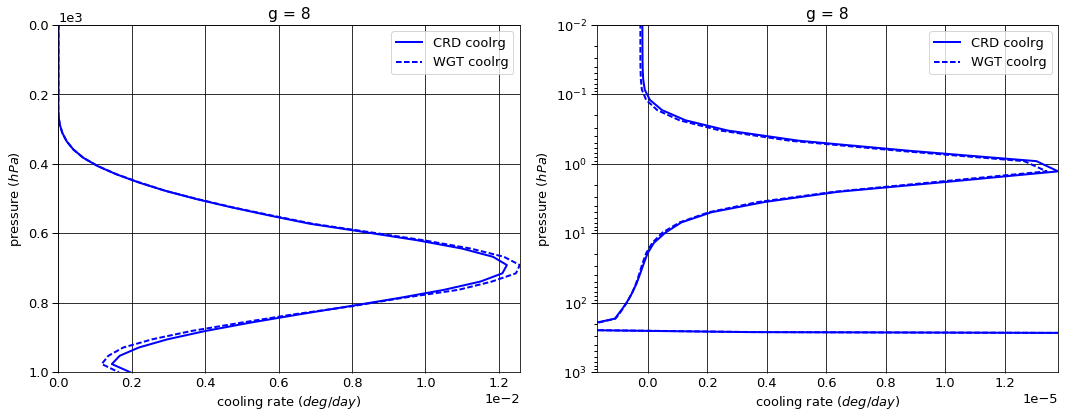

# Figure: cooling rate g-group 9

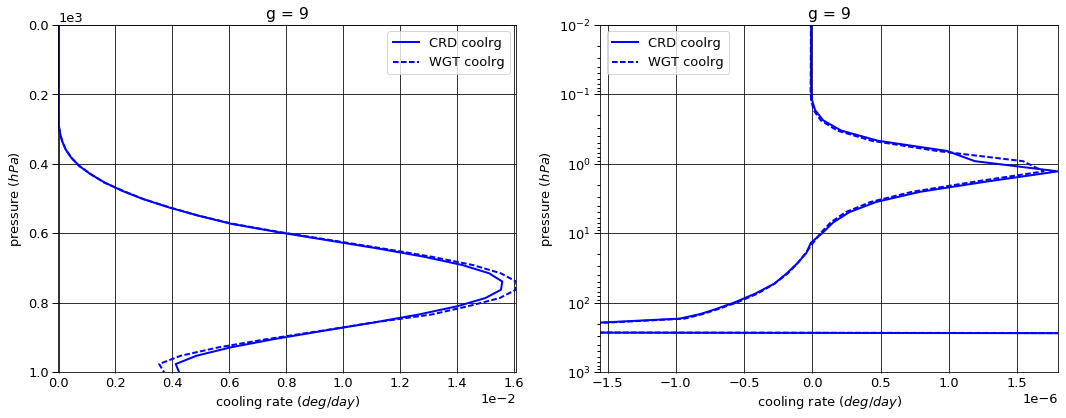

# Figure: cooling rate g-group 10

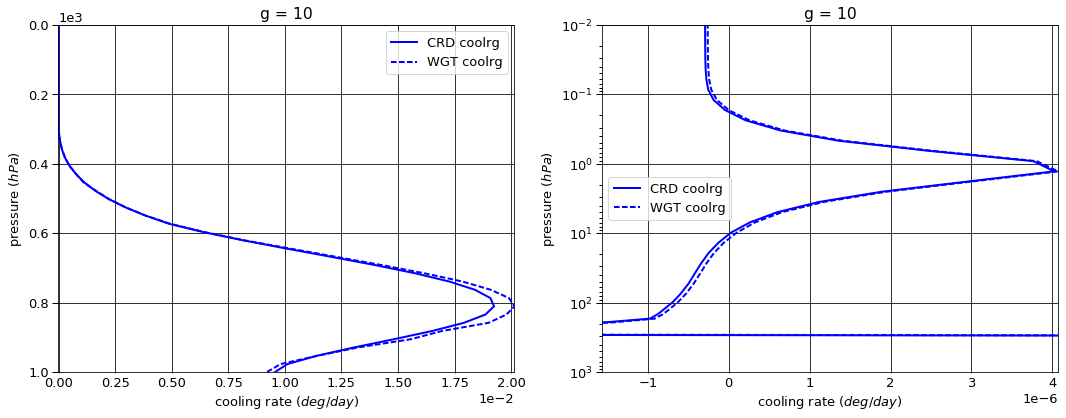

# Figure: cooling rate g-group 11

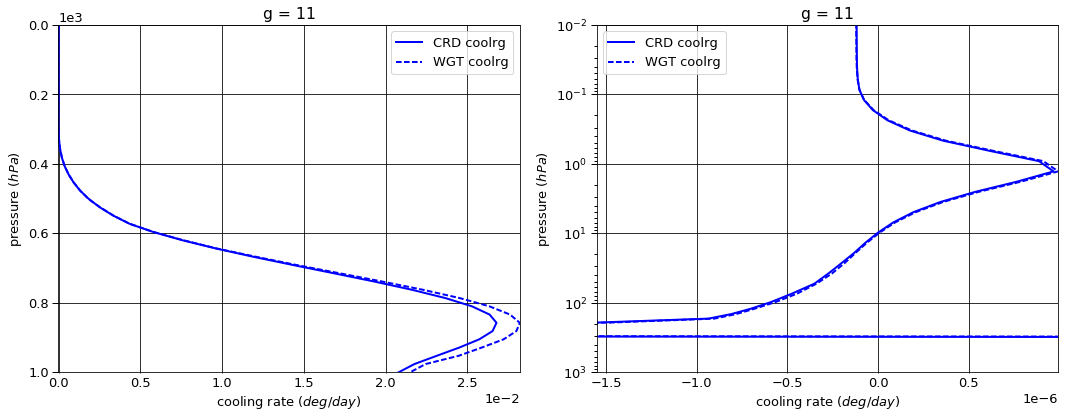

# Figure: cooling rate g-group 12

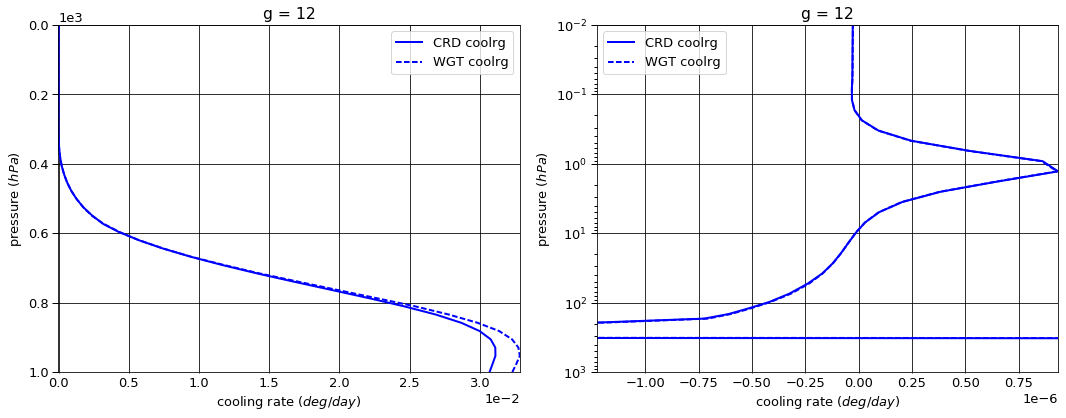

# Figure: cooling rate g-group 13

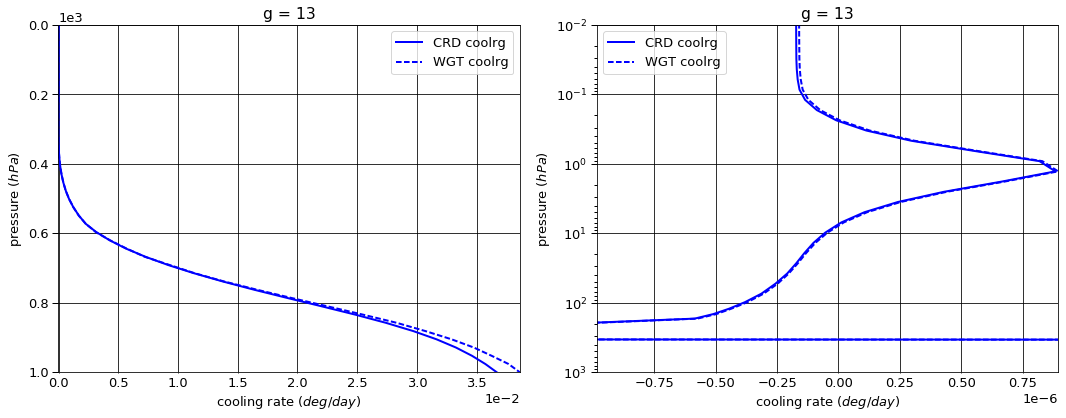

# Figure: cooling rate g-group 14

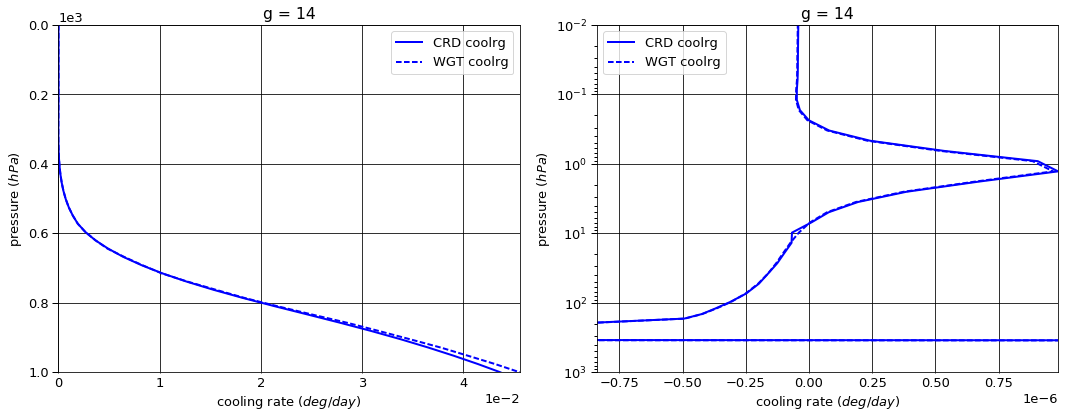

# Figure: cooling rate g-group 15

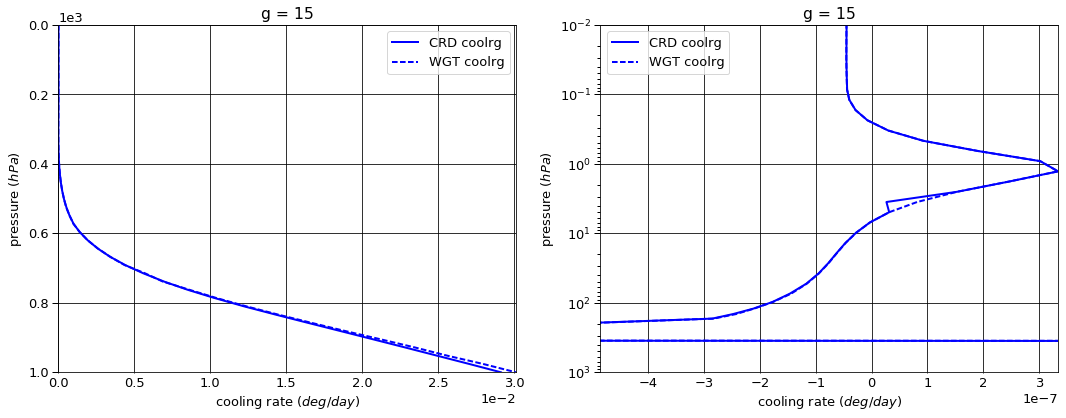

# Figure: cooling rate g-group 16

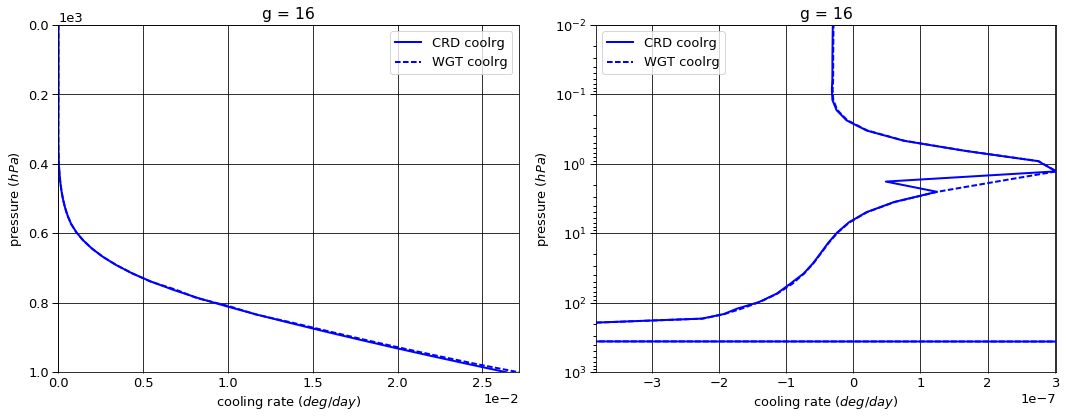

# Figure: cooling rate g-group 17

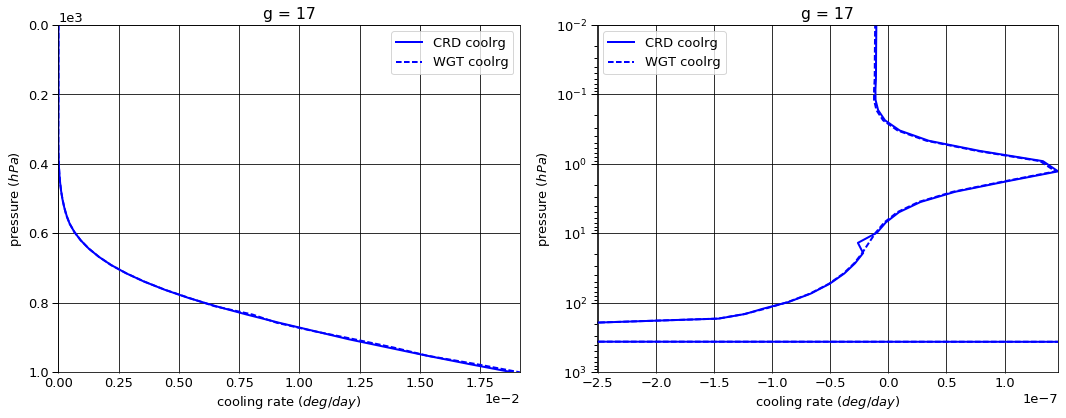

# Figure: cooling rate g-group 18

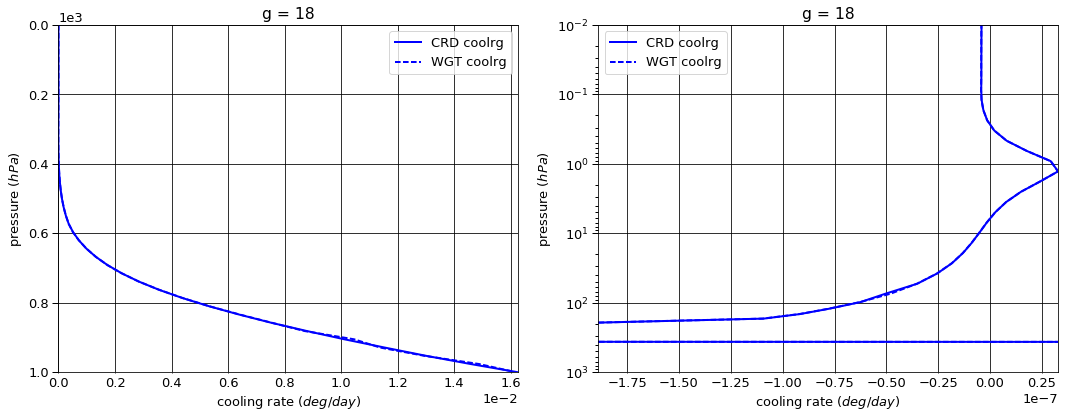

# Figure: cooling rate g-group 19

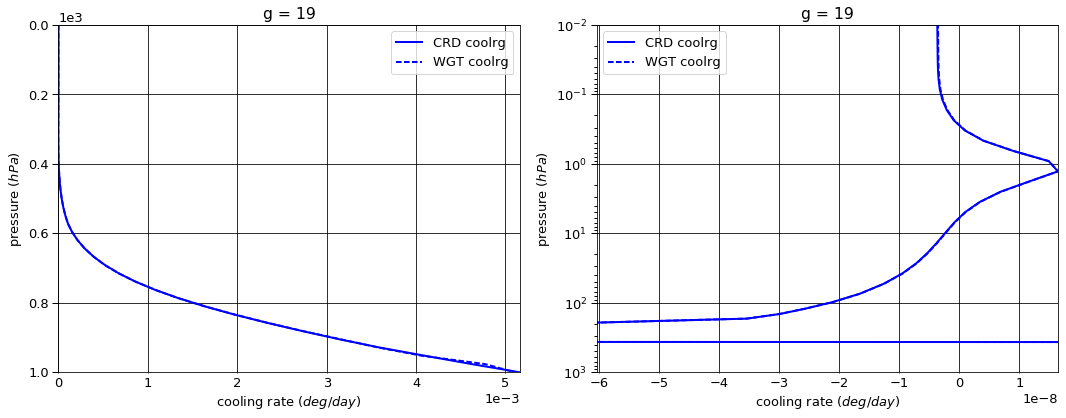

# Figure: cooling rate g-group 20

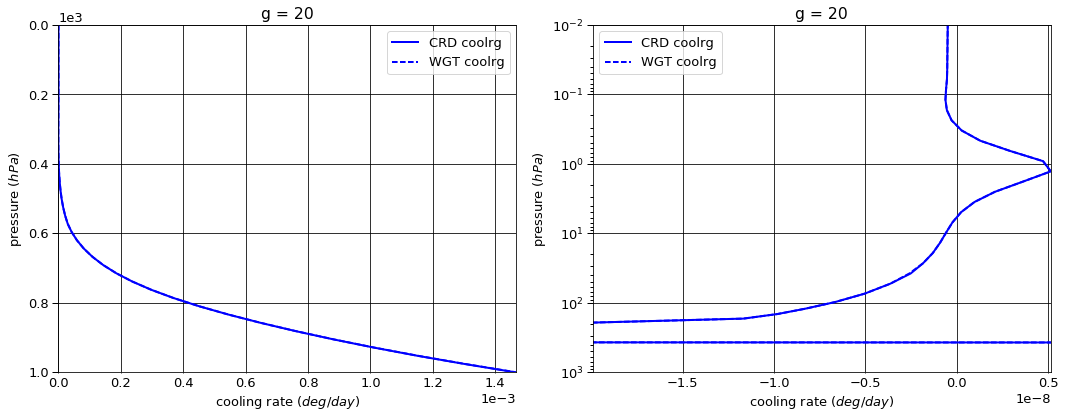

# Figure: cooling rate g-group total

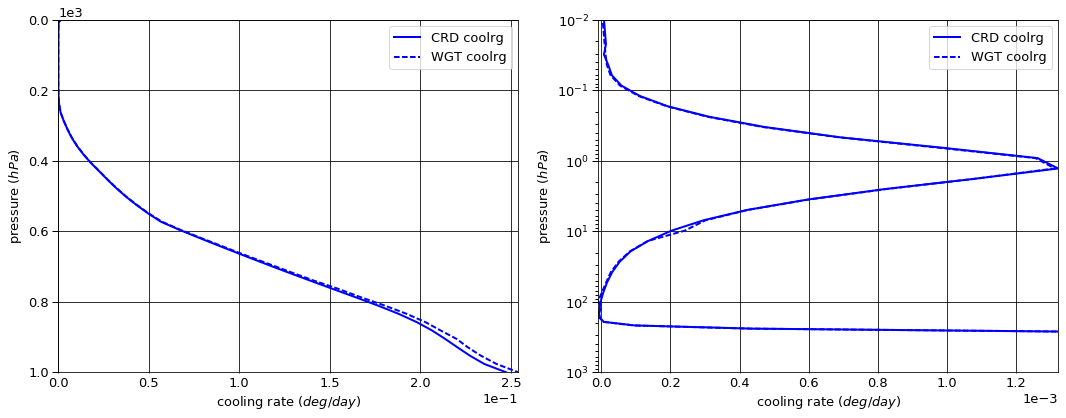

In [23]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [24]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.004767  0.000000 -0.004767
   1013.0   76    -0.010370  0.010364 -0.000006
2  0.0      1     -0.053246  0.000000 -0.053246
   1013.0   76    -0.111241  0.111128 -0.000113
3  0.0      1     -0.101413  0.000000 -0.101413
   1013.0   76    -0.191512  0.191169 -0.000343
4  0.0      1     -0.124798  0.000000 -0.124798
   1013.0   76    -0.214104  0.213596 -0.000508
5  0.0      1     -0.206087  0.000000 -0.206087
   1013.0   76    -0.331045  0.329703 -0.001342
6  0.0      1     -0.284179  0.000000 -0.284179
   1013.0   76    -0.424842  0.422677 -0.002166
7  0.0      1     -0.316365  0.000000 -0.316365
   1013.0   76    -0.444231  0.440814 -0.003416
8  0.0      1     -0.460451  0.000000 -0.460451
   1013.0   76    -0.608750  0.600774 -0.007975
9  0.0      1     -0.627829  0.000000 -0.627829
   1013.0   76    -0.786419  0.763700 -0.022720
10 0.0      1     -0.844295  0.000000 -0.844295
   1013.0   76    -1.003657  0.922350 -0.081307
11 0.0      1     -1.296893  0.000000 -1.296893
   1013.0   76    -1.471992  1.208862 -0.263129
12 0.0      1     -1.677603  0.000000 -1.677603
   1013.0   76    -1.833105  1.243864 -0.589241
13 0.0      1     -2.121436  0.000000 -2.121436
   1013.0   76    -2.254067  1.184709 -1.069358
14 0.0      1     -2.993720  0.000000 -2.993720
   1013.0   76    -3.118486  1.217440 -1.901046
15 0.0      1     -2.753891  0.000000 -2.753891
   1013.0   76    -2.824273  0.730512 -2.093761
16 0.0      1     -3.619743  0.000000 -3.619743
   1013.0   76    -3.676555  0.615572 -3.060983
17 0.0      1     -4.015633  0.000000 -4.015633
   1013.0   76    -4.053106  0.418674 -3.634432
18 0.0      1     -5.358873  0.000000 -5.358873
   1013.0   76    -5.389054  0.348316 -5.040737
19 0.0      1     -2.450262  0.000000 -2.450262
   1013.0   76    -2.459498  0.108160 -2.351338
20 0.0      1     -1.428625  0.000000 -1.428625
   1013.0   76    -1.431238  0.030279 -1.400959


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.004743  0.000000 -0.004743
   1013.0   76    -0.010370  0.010364 -0.000006
2  0.0      1     -0.052969  0.000000 -0.052969
   1013.0   76    -0.111241  0.111176 -0.000065
3  0.0      1     -0.100921  0.000000 -0.100921
   1013.0   76    -0.191512  0.191186 -0.000326
4  0.0      1     -0.124464  0.000000 -0.124464
   1013.0   76    -0.214104  0.213629 -0.000475
5  0.0      1     -0.205434  0.000000 -0.205434
   1013.0   76    -0.331045  0.329957 -0.001088
6  0.0      1     -0.283264  0.000000 -0.283264
   1013.0   76    -0.424842  0.423040 -0.001802
7  0.0      1     -0.315312  0.000000 -0.315312
   1013.0   76    -0.444231  0.441443 -0.002788
8  0.0      1     -0.458856  0.000000 -0.458856
   1013.0   76    -0.608750  0.602746 -0.006004
9  0.0      1     -0.625657  0.000000 -0.625657
   1013.0   76    -0.786419  0.770066 -0.016353
10 0.0      1     -0.841005  0.000000 -0.841005
   1013.0   76    -1.003657  0.945432 -0.058225
11 0.0      1     -1.292930  0.000000 -1.292930
   1013.0   76    -1.471992  1.251462 -0.220530
12 0.0      1     -1.674554  0.000000 -1.674554
   1013.0   76    -1.833105  1.286806 -0.546299
13 0.0      1     -2.119116  0.000000 -2.119116
   1013.0   76    -2.254067  1.221384 -1.032683
14 0.0      1     -2.992119  0.000000 -2.992119
   1013.0   76    -3.118486  1.246757 -1.871729
15 0.0      1     -2.753171  0.000000 -2.753171
   1013.0   76    -2.824273  0.744843 -2.079430
16 0.0      1     -3.619289  0.000000 -3.619289
   1013.0   76    -3.676555  0.624127 -3.052428
17 0.0      1     -4.015443  0.000000 -4.015443
   1013.0   76    -4.053106  0.422086 -3.631020
18 0.0      1     -5.358766  0.000000 -5.358766
   1013.0   76    -5.389054  0.349339 -5.039714
19 0.0      1     -2.450246  0.000000 -2.450246
   1013.0   76    -2.459498  0.108412 -2.351086
20 0.0      1     -1.428624  0.000000 -1.428624
   1013.0   76    -1.431238  0.030308 -1.400930


WGT - CRD


flug      fldg         fnetg
g  pressure level                                      
1  0.0      1      2.383510e-05  0.000000  2.383510e-05
   1013.0   76     0.000000e+00  0.000000  0.000000e+00
2  0.0      1      2.774650e-04  0.000000  2.774650e-04
   1013.0   76     0.000000e+00  0.000048  4.764757e-05
3  0.0      1      4.916000e-04  0.000000  4.916000e-04
   1013.0   76     0.000000e+00  0.000017  1.689819e-05
4  0.0      1      3.347900e-04  0.000000  3.347900e-04
   1013.0   76     0.000000e+00  0.000033  3.282735e-05
5  0.0      1      6.532700e-04  0.000000  6.532700e-04
   1013.0   76     0.000000e+00  0.000254  2.535787e-04
6  0.0      1      9.156300e-04  0.000000  9.156300e-04
   1013.0   76     0.000000e+00  0.000363  3.634210e-04
7  0.0      1      1.053130e-03  0.000000  1.053130e-03
   1013.0   76     0.000000e+00  0.000629  6.285803e-04
8  0.0      1      1.594710e-03  0.000000  1.594710e-03
   1013.0   76     0.000000e+00  0.001972  1.971916e-03
9  0.0      1      2.171810e-03  0.000000  2.171810e-03
   1013.0   76     0.000000e+00  0.006366  6.366444e-03
10 0.0      1      3.289260e-03  0.000000  3.289260e-03
   1013.0   76     0.000000e+00  0.023082  2.308226e-02
11 0.0      1      3.962700e-03  0.000000  3.962700e-03
   1013.0   76     0.000000e+00  0.042599  4.259930e-02
12 0.0      1      3.049400e-03  0.000000  3.049400e-03
   1013.0   76     0.000000e+00  0.042942  4.294193e-02
13 0.0      1      2.319700e-03  0.000000  2.319700e-03
   1013.0   76     0.000000e+00  0.036675  3.667500e-02
14 0.0      1      1.601200e-03  0.000000  1.601200e-03
   1013.0   76     0.000000e+00  0.029317  2.931720e-02
15 0.0      1      7.200000e-04  0.000000  7.200000e-04
   1013.0   76     0.000000e+00  0.014331  1.433050e-02
16 0.0      1      4.535000e-04  0.000000  4.535000e-04
   1013.0   76     0.000000e+00  0.008556  8.555800e-03
17 0.0      1      1.895000e-04  0.000000  1.895000e-04
   1013.0   76     0.000000e+00  0.003412  3.412100e-03
18 0.0      1      1.073000e-04  0.000000  1.073000e-04
   1013.0   76     0.000000e+00  0.001023  1.023000e-03
19 0.0      1      1.540000e-05  0.000000  1.540000e-05
   1013.0   76     0.000000e+00  0.000252  2.520000e-04
20 0.0      1      1.000000e-06  0.000000  1.000000e-06
   1013.0   76     0.000000e+00  0.000029  2.930000e-05

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.794375e-07
   1001.112500 75     2.122639e-06
2  0.000312    1     -1.215622e-06
   1001.112500 75     4.673494e-05
3  0.000312    1     -1.144708e-06
   1001.112500 75     1.299739e-04
4  0.000312    1     -1.128181e-06
   1001.112500 75     1.904731e-04
5  0.000312    1     -3.779353e-06
   1001.112500 75     4.463411e-04
6  0.000312    1     -4.677700e-08
   1001.112500 75     6.979268e-04
7  0.000312    1     -7.362048e-08
   1001.112500 75     9.720243e-04
8  0.000312    1     -1.782903e-07
   1001.112500 75     1.958376e-03
9  0.000312    1     -6.981239e-09
   1001.112500 75     4.240391e-03
10 0.000312    1     -2.920743e-07
   1001.112500 75     9.545024e-03
11 0.000312    1     -1.189197e-07
   1001.112500 75     2.078956e-02
12 0.000312    1     -2.397127e-08
   1001.112500 75     3.069286e-02
13 0.000312    1     -1.714524e-07
   1001.112500 75     3.668017e-02
14 0.000312    1     -3.791574e-08
   1001.112500 75     4.369967e-02
15 0.000312    1     -4.352955e-08
   1001.112500 75     2.914081e-02
16 0.000312    1     -2.887961e-08
   1001.112500 75     2.642811e-02
17 0.000312    1     -9.642546e-09
   1001.112500 75     1.884106e-02
18 0.000312    1     -3.890641e-09
   1001.112500 75     1.626801e-02
19 0.000312    1     -3.788572e-09
   1001.112500 75     5.160617e-03
20 0.000312    1     -4.412996e-10
   1001.112500 75     1.464323e-03


WGT


coolrg
g  pressure    layer              
1  0.000312    1      3.190367e-07
   1001.112500 75     2.122639e-06
2  0.000312    1     -1.673977e-06
   1001.112500 75     2.336624e-05
3  0.000312    1     -2.876961e-06
   1001.112500 75     1.265861e-04
4  0.000312    1     -1.561872e-06
   1001.112500 75     1.803390e-04
5  0.000312    1     -4.870398e-06
   1001.112500 75     4.015222e-04
6  0.000312    1     -5.647884e-08
   1001.112500 75     6.444073e-04
7  0.000312    1     -7.459389e-08
   1001.112500 75     8.950080e-04
8  0.000312    1     -2.320590e-07
   1001.112500 75     1.646594e-03
9  0.000312    1     -8.158038e-09
   1001.112500 75     3.712901e-03
10 0.000312    1     -2.629020e-07
   1001.112500 75     9.187019e-03
11 0.000312    1     -1.218707e-07
   1001.112500 75     2.149251e-02
12 0.000312    1     -2.298060e-08
   1001.112500 75     3.231154e-02
13 0.000312    1     -1.597865e-07
   1001.112500 75     3.860917e-02
14 0.000312    1     -3.975299e-08
   1001.112500 75     4.561923e-02
15 0.000312    1     -4.378773e-08
   1001.112500 75     3.013239e-02
16 0.000312    1     -2.788893e-08
   1001.112500 75     2.716491e-02
17 0.000312    1     -1.059119e-08
   1001.112500 75     1.914406e-02
18 0.000312    1     -3.926666e-09
   1001.112500 75     1.619278e-02
19 0.000312    1     -3.686503e-09
   1001.112500 75     5.106956e-03
20 0.000312    1     -4.473037e-10
   1001.112500 75     1.467129e-03


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      3.959914e-08
   1001.112500 75     0.000000e+00
2  0.000312    1     -4.583551e-07
   1001.112500 75    -2.336870e-05
3  0.000312    1     -1.732253e-06
   1001.112500 75    -3.387820e-06
4  0.000312    1     -4.336918e-07
   1001.112500 75    -1.013418e-05
5  0.000312    1     -1.091045e-06
   1001.112500 75    -4.481885e-05
6  0.000312    1     -9.701836e-09
   1001.112500 75    -5.351949e-05
7  0.000312    1     -9.734110e-10
   1001.112500 75    -7.701639e-05
8  0.000312    1     -5.376875e-08
   1001.112500 75    -3.117820e-04
9  0.000312    1     -1.176799e-09
   1001.112500 75    -5.274903e-04
10 0.000312    1      2.917230e-08
   1001.112500 75    -3.580047e-04
11 0.000312    1     -2.951000e-09
   1001.112500 75     7.029530e-04
12 0.000312    1      9.906730e-10
   1001.112500 75     1.618686e-03
13 0.000312    1      1.166592e-08
   1001.112500 75     1.928993e-03
14 0.000312    1     -1.837247e-09
   1001.112500 75     1.919556e-03
15 0.000312    1     -2.581750e-10
   1001.112500 75     9.915800e-04
16 0.000312    1      9.906730e-10
   1001.112500 75     7.368050e-04
17 0.000312    1     -9.486442e-10
   1001.112500 75     3.029950e-04
18 0.000312    1     -3.602450e-11
   1001.112500 75    -7.523000e-05
19 0.000312    1      1.020693e-10
   1001.112500 75    -5.366080e-05
20 0.000312    1     -6.004080e-12
   1001.112500 75     2.805900e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.740107,0.000000,-30.740107
1013.0,76,-32.637543,11.112663,-21.524880



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.716882,0.000000,-30.716882
1013.0,76,-32.637543,11.324562,-21.312981



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.023225,0.0000,0.023225
1013.0,76,0.000000,0.2119,0.211900


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000008
1001.112500,75,0.247395



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000012
1001.112500,75,0.254061



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000004
1001.112500,75,0.006666


In [25]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.000313,0.000322
2,0.003438,0.003390
3,0.005875,0.005865
4,0.006562,0.006560
5,0.010188,0.010112
6,0.013062,0.012986
7,0.013688,0.013554
8,0.018687,0.018628
9,0.024188,0.024029


In [26]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,7.106481e-22
2,4.192174e-22
3,2.472999e-22
4,1.458843e-22
5,8.605842e-23
6,5.076660e-23
7,2.994765e-23
8,1.766637e-23
9,1.042154e-23


In [29]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [20]
    p_refs = [500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [30]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,7.106481e-22,NaN,0.000313,0.000322,0.000313,0.000322,500.0
2,4.192174e-22,0.589909,0.003438,0.003390,0.003750,0.003712,500.0
3,2.472999e-22,0.589909,0.005875,0.005865,0.009625,0.009577,500.0
4,1.458843e-22,0.589909,0.006562,0.006560,0.016188,0.016137,500.0
5,8.605842e-23,0.589909,0.010188,0.010112,0.026375,0.026249,500.0
6,5.076660e-23,0.589909,0.013062,0.012986,0.039438,0.039235,500.0
7,2.994765e-23,0.589909,0.013688,0.013554,0.053125,0.052789,500.0
8,1.766637e-23,0.589909,0.018687,0.018628,0.071813,0.071417,500.0
9,1.042154e-23,0.589909,0.024188,0.024029,0.096000,0.095446,500.0


In [31]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [32]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                     
1     1      0.000312  6.402504e-22  1.566162e-22   4.088020
      2      0.000312  7.638258e-22  4.194580e-23  18.209830
      3      0.000312  1.281922e-22  1.055851e-23  12.141127
      4      0.000312  3.059235e-23  4.652364e-24   6.575657
      5      0.000312  4.096074e-23  2.184229e-24  18.752954
      6      0.000312  3.100251e-25  1.772115e-25   1.749464
      7      0.000312  3.187161e-25  1.509777e-25   2.111014
      8      0.000312  6.147414e-25  8.120923e-26   7.569847
      9      0.000312  1.443197e-26  1.114857e-26   1.294513
      10     0.000312  3.210641e-25  4.740942e-26   6.772159
      11     0.000312  9.113666e-26  1.101868e-26   8.271107
      12     0.000312  1.257238e-26  5.818423e-27   2.160788
      13     0.000312  6.588934e-26  7.746832e-27   8.505328
      14     0.000312  1.134849e-26  3.260304e-27   3.480808
      15     0.000312  1.333056e-26  2.395362e-27   5.565158
      16     0.000312  6.317140e-27  1.179726e-27   5.354751
      17     0.000312  2.135780e-27  4.302399e-28   4.964161
      18     0.000312  5.976118e-28  1.494338e-28   3.999175
      19     0.000312  1.200984e-27  1.054512e-28  11.389004
      20     0.000312  2.411350e-28  9.621187e-29   2.506292
2     1      0.000750  6.482836e-22  1.567247e-22   4.136449
      2      0.000750  7.678819e-22  4.200435e-23  18.281009
      3      0.000750  1.290676e-22  1.060059e-23  12.175518
      4      0.000750  3.088033e-23  4.655748e-24   6.632733
      5      0.000750  4.110068e-23  2.188043e-24  18.784216
      6      0.000750  3.153240e-25  1.787395e-25   1.764154
      7      0.000750  3.228055e-25  1.516606e-25   2.128473
      8      0.000750  6.238730e-25  8.147673e-26   7.657070
      9      0.000750  1.475246e-26  1.133622e-26   1.301356
      10     0.000750  3.235017e-25  4.759217e-26   6.797372
      11     0.000750  9.177264e-26  1.103068e-26   8.319760
      12     0.000750  1.275213e-26  5.855409e-27   2.177838
      13     0.000750  6.630902e-26  7.777512e-27   8.525737
      14     0.000750  1.148085e-26  3.272508e-27   3.508273
      15     0.000750  1.342647e-26  2.407730e-27   5.576400
      16     0.000750  6.368605e-27  1.187574e-27   5.362700
      17     0.000750  2.155343e-27  4.324603e-28   4.983909
      18     0.000750  6.025674e-28  1.501188e-28   4.013936
      19     0.000750  1.204927e-27  1.059511e-28  11.372476
      20     0.000750  2.441758e-28  9.675047e-29   2.523769
3     1      0.001052  6.656275e-22  1.569380e-22   4.241341
      2      0.001052  7.765622e-22  4.212103e-23  18.436448
      3      0.001052  1.309442e-22  1.068676e-23  12.252933
      4      0.001052  3.149874e-23  4.662678e-24   6.755505
      5      0.001052  4.140211e-23  2.195748e-24  18.855585
      6      0.001052  3.267884e-25  1.819006e-25   1.796522
      7      0.001052  3.315863e-25  1.530561e-25   2.166436
      8      0.001052  6.436695e-25  8.203883e-26   7.845913
      9      0.001052  1.544717e-26  1.173264e-26   1.316598
      10     0.001052  3.287244e-25  4.796811e-26   6.852979
      11     0.001052  9.313307e-26  1.105311e-26   8.425957
      12     0.001052  1.314057e-26  5.931321e-27   2.215455
      13     0.001052  6.720752e-26  7.842131e-27   8.570058
      14     0.001052  1.176583e-26  3.297393e-27   3.568221
      15     0.001052  1.363220e-26  2.433659e-27   5.601525
      16     0.001052  6.479414e-27  1.203995e-27   5.381596
      17     0.001052  2.197470e-27  4.370662e-28   5.027774
      18     0.001052  6.131582e-28  1.515224e-28   4.046651
      19     0.001052  1.213353e-27  1.069653e-28  11.343418
      20     0.001052  2.507291e-28  9.786798e-29   2.561911
4     1      0.001476  6.844241e-22  1.571424e-22   4.355439
      2      0.001476  7.858329e-22  4.224741e-23  18.600736
      3      0.001476  1.329558e-22  1.077812e-23  12.335719
      4      0.001476  3.216491e-23  4.670241e-2

# Histogram of wavenumbers in g-group 1

In [33]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [34]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
